<a href="https://colab.research.google.com/github/aayushbhurtel/2143-OOP-Aayush/blob/main/Progan_Celeb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install mtcnn lz4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.5 MB/s eta 0:00:00


In [7]:
!gdown 1bRyXZzwc5vKqkL272tbHeppF_7H_Goh2

Downloading...
From (original): https://drive.google.com/uc?id=1bRyXZzwc5vKqkL272tbHeppF_7H_Goh2
From (redirected): https://drive.google.com/uc?id=1bRyXZzwc5vKqkL272tbHeppF_7H_Goh2&confirm=t&uuid=ff2d6912-9b8a-435d-8959-114bf6ddec34
To: /content/img_align_celeba.zip
100% 1.44G/1.44G [00:19<00:00, 72.5MB/s]


In [8]:
!unzip img_align_celeba.zip

Streaming output truncated to the last 5000 lines.
 extracting: img_align_celeba/197600.jpg  
 extracting: img_align_celeba/197601.jpg  
 extracting: img_align_celeba/197602.jpg  
 extracting: img_align_celeba/197603.jpg  
 extracting: img_align_celeba/197604.jpg  
 extracting: img_align_celeba/197605.jpg  
 extracting: img_align_celeba/197606.jpg  
 extracting: img_align_celeba/197607.jpg  
 extracting: img_align_celeba/197608.jpg  
 extracting: img_align_celeba/197609.jpg  
 extracting: img_align_celeba/197610.jpg  
 extracting: img_align_celeba/197611.jpg  
 extracting: img_align_celeba/197612.jpg  
 extracting: img_align_celeba/197613.jpg  
 extracting: img_align_celeba/197614.jpg  
 extracting: img_align_celeba/197615.jpg  
 extracting: img_align_celeba/197616.jpg  
 extracting: img_align_celeba/197617.jpg  
 extracting: img_align_celeba/197618.jpg  
 extracting: img_align_celeba/197619.jpg  
 extracting: img_align_celeba/197620.jpg  
 extracting: img_align_celeba/197621.jpg  
 ex

In [9]:
from math import sqrt
from numpy import load, asarray, zeros, ones, savez_compressed
from numpy.random import randn, randint
from skimage.transform import resize
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D
from tensorflow.keras.layers import UpSampling2D, AveragePooling2D, LeakyReLU, Layer, Add
from keras.constraints import max_norm
from keras.initializers import RandomNormal
import mtcnn
from mtcnn.mtcnn import MTCNN
import tensorflow as tf
from matplotlib import pyplot
import cv2
import os
from os import listdir
from PIL import Image
import cv2
import lz4
print(lz4.__version__)

4.4.4


In [10]:
# Loading the image file
def load_image(filename):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = asarray(image)
    return pixels

In [11]:
# extract the face from a loaded image and resize
def extract_face(model, pixels, required_size=(128, 128)):
    # detect face in the image
    faces = model.detect_faces(pixels)
    if len(faces) == 0:
        return None

    # extract details of the face
    x1, y1, width, height = faces[0]['box']
    x1, y1 = abs(x1), abs(y1)

    x2, y2 = x1 + width, y1 + height
    face_pixels = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face_pixels)
    image = image.resize(required_size)
    face_array = asarray(image)

    return face_array

In [12]:
# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
    # prepare model
    model = MTCNN()
    faces = list()

    for filename in os.listdir(directory):
        # Computing the retrieval and extraction of faces
        pixels = load_image(directory + filename)
        face = extract_face(model, pixels)
        if face is None:
            continue
        faces.append(face)
        print(len(faces), face.shape)
        if len(faces) >= n_faces:
            break

    return asarray(faces)

In [13]:
# load and extract all faces
directory = 'img_align_celeba/'
all_faces = load_faces(directory, 1000)
print('Loaded: ', all_faces.shape)

# save in compressed format
savez_compressed('img_align_celeba_128.npz', all_faces)

1 (128, 128, 3)
2 (128, 128, 3)
3 (128, 128, 3)
4 (128, 128, 3)
5 (128, 128, 3)
6 (128, 128, 3)
7 (128, 128, 3)
8 (128, 128, 3)
9 (128, 128, 3)
10 (128, 128, 3)
11 (128, 128, 3)
12 (128, 128, 3)
13 (128, 128, 3)
14 (128, 128, 3)
15 (128, 128, 3)
16 (128, 128, 3)
17 (128, 128, 3)
18 (128, 128, 3)
19 (128, 128, 3)
20 (128, 128, 3)
21 (128, 128, 3)
22 (128, 128, 3)
23 (128, 128, 3)
24 (128, 128, 3)
25 (128, 128, 3)
26 (128, 128, 3)
27 (128, 128, 3)
28 (128, 128, 3)
29 (128, 128, 3)
30 (128, 128, 3)
31 (128, 128, 3)
32 (128, 128, 3)
33 (128, 128, 3)
34 (128, 128, 3)
35 (128, 128, 3)
36 (128, 128, 3)
37 (128, 128, 3)
38 (128, 128, 3)
39 (128, 128, 3)
40 (128, 128, 3)
41 (128, 128, 3)
42 (128, 128, 3)
43 (128, 128, 3)
44 (128, 128, 3)
45 (128, 128, 3)
46 (128, 128, 3)
47 (128, 128, 3)
48 (128, 128, 3)
49 (128, 128, 3)
50 (128, 128, 3)
51 (128, 128, 3)
52 (128, 128, 3)
53 (128, 128, 3)
54 (128, 128, 3)
55 (128, 128, 3)
56 (128, 128, 3)
57 (128, 128, 3)
58 (128, 128, 3)
59 (128, 128, 3)
60 (12

In [14]:
# load the prepared dataset
from numpy import load
data = load('img_align_celeba_128.npz')
faces = data['arr_0']
print('Loaded: ', faces.shape)

Loaded:  (1000, 128, 128, 3)


Loaded:  (1000, 128, 128, 3)


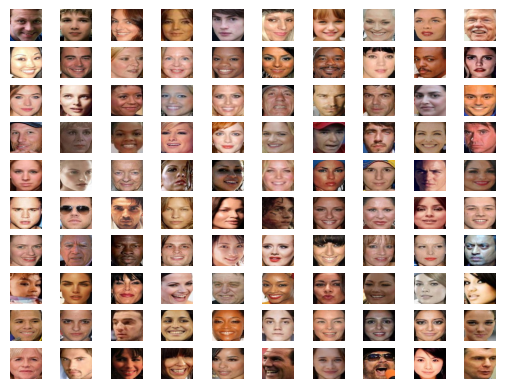

In [15]:
# load the prepared dataset
from numpy import load
from matplotlib import pyplot

# plot a list of loaded faces
def plot_faces(faces, n):
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(faces[i].astype('uint8'))
	pyplot.show()

faces = data['arr_0']
print('Loaded: ', faces.shape)
plot_faces(faces, 10)

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

# Pixel-wise feature vector normalization layer
class PixelNormalization(Layer):
    def __init__(self, epsilon=1e-8, **kwargs):
        super(PixelNormalization, self).__init__(**kwargs)
        self.epsilon = epsilon

    def call(self, inputs):
        # Square values
        values = tf.square(inputs)
        # Mean across channels
        mean_values = tf.reduce_mean(values, axis=-1, keepdims=True)
        # Add epsilon for numerical stability
        l2 = tf.sqrt(mean_values + self.epsilon)
        # Normalize
        normalized = inputs / l2
        return normalized

    def get_config(self):
        config = super(PixelNormalization, self).get_config()
        config.update({"epsilon": self.epsilon})
        return config


In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

# Mini-batch standard deviation layer
class MinibatchStdev(Layer):
    def __init__(self, epsilon=1e-8, **kwargs):
        super(MinibatchStdev, self).__init__(**kwargs)
        self.epsilon = epsilon

    def call(self, inputs):
        # Compute mean over batch
        mean = tf.reduce_mean(inputs, axis=0, keepdims=True)
        # Squared differences
        squ_diffs = tf.square(inputs - mean)
        # Mean of squared diffs
        mean_sq_diff = tf.reduce_mean(squ_diffs, axis=0, keepdims=True)
        # Std dev
        stdev = tf.sqrt(mean_sq_diff + self.epsilon)

        # Take average standard deviation (single scalar)
        mean_pix = tf.reduce_mean(stdev, keepdims=True)

        # Get batch shape
        shape = tf.shape(inputs)
        # Tile scalar to match batch, height, width, 1
        output = tf.tile(mean_pix, (shape[0], shape[1], shape[2], 1))

        # Concatenate as new channel
        combined = tf.concat([inputs, output], axis=-1)
        return combined

    def get_config(self):
        config = super(MinibatchStdev, self).get_config()
        config.update({"epsilon": self.epsilon})
        return config


In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

# Weighted sum output layer
class WeightedSum(Layer):
    def __init__(self, alpha=0.0, **kwargs):
        super(WeightedSum, self).__init__(**kwargs)
        # alpha is a trainable or updateable variable
        self.alpha = tf.Variable(alpha, trainable=False, dtype=tf.float32, name="ws_alpha")

    def call(self, inputs):
        # only supports a weighted sum of two inputs
        assert len(inputs) == 2, "WeightedSum only supports two inputs"
        return (1.0 - self.alpha) * inputs[0] + self.alpha * inputs[1]

    def get_config(self):
        config = super(WeightedSum, self).get_config()
        config.update({"alpha": float(self.alpha.numpy())})
        return config


# Wasserstein loss function
def wasserstein_loss(y_true, y_pred):
    return tf.reduce_mean(y_true * y_pred)


In [31]:
import numpy as np
from numpy.random import randn, randint
from skimage.transform import resize
import tensorflow as tf

# Load dataset from .npy or .npz
def load_real_samples(filename):
    data = np.load(filename)
    # if saved as .npz, pick the first array
    if isinstance(data, np.lib.npyio.NpzFile):
        X = data[list(data.keys())[0]]
    else:
        X = data
    X = X.astype('float32')
    X = (X - 127.5) / 127.5
    return X

# Select real samples for training
def generate_real_samples(dataset, n_samples):
    ix = randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    y = np.ones((n_samples, 1), dtype=np.float32)
    return X, y

# Generate points in latent space
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    return x_input.reshape(n_samples, latent_dim)

# Generate fake samples from generator
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    # Use TF 2.x eager execution instead of .predict()
    X = generator(x_input, training=False)
    y = -np.ones((n_samples, 1), dtype=np.float32)
    return X.numpy(), y

# Update fade-in alpha for WeightedSum layers
def update_fadein(models, step, n_steps):
    alpha_val = step / float(n_steps - 1)
    for model in models:
        for layer in model.layers:
            if isinstance(layer, WeightedSum):
                layer.alpha.assign(alpha_val)

# Scale images to preferred size
def scale_dataset(images, new_shape):
    return np.asarray([resize(img, new_shape, anti_aliasing=True) for img in images])


In [32]:
# adding a generator block
def add_generator_block(old_model):
    init = RandomNormal(stddev=0.02)
    const = max_norm(1.0)
    block_end = old_model.layers[-2].output

    # upsample, and define new block
    upsampling = UpSampling2D()(block_end)
    g = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(upsampling)
    g = PixelNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)
    g = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
    g = PixelNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)

    out_image = Conv2D(3, (1,1), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
    model1 = Model(old_model.input, out_image)
    out_old = old_model.layers[-1]
    out_image2 = out_old(upsampling)

    merged = WeightedSum()([out_image2, out_image])
    model2 = Model(old_model.input, merged)
    return [model1, model2]

In [33]:
# define generator models
def define_generator(latent_dim, n_blocks, in_dim=4):
    init = RandomNormal(stddev=0.02)
    const = max_norm(1.0)
    model_list = list()
    in_latent = Input(shape=(latent_dim,))
    g  = Dense(128 * in_dim * in_dim, kernel_initializer=init, kernel_constraint=const)(in_latent)
    g = Reshape((in_dim, in_dim, 128))(g)

    # conv 4x4, input block
    g = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
    g = PixelNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)

    # conv 3x3
    g = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
    g = PixelNormalization()(g)
    g = LeakyReLU(alpha=0.2)(g)

    # conv 1x1, output block
    out_image = Conv2D(3, (1,1), padding='same', kernel_initializer=init, kernel_constraint=const)(g)
    model = Model(in_latent, out_image)
    model_list.append([model, model])

    for i in range(1, n_blocks):
        old_model = model_list[i - 1][0]
        models = add_generator_block(old_model)
        model_list.append(models)

    return model_list

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import Adam

# Modernized discriminator block addition
def add_discriminator_block(old_model, n_input_layers=3):
    init = RandomNormal(stddev=0.02)
    const = MaxNorm(1.0)

    # get old input shape
    in_shape = old_model.input.shape
    input_shape = (in_shape[1]*2, in_shape[2]*2, in_shape[3])  # double spatial size
    in_image = Input(shape=input_shape)

    # New block
    d = Conv2D(128, (1,1), padding='same', kernel_initializer=init, kernel_constraint=const)(in_image)
    d = LeakyReLU(alpha=0.2)(d)

    d = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(d)
    d = LeakyReLU(alpha=0.2)(d)
    #d = AveragePooling2D()(d)
    d = AveragePooling2D(pool_size=(2, 2))(d)
    block_new = d

    # model1: just the new block + old model
    x = block_new
    for i in range(n_input_layers, len(old_model.layers)):
        x = old_model.layers[i](x)
    model1 = Model(in_image, x)
    model1.compile(loss=wasserstein_loss, optimizer=Adam(learning_rate=0.001, beta_1=0.0, beta_2=0.99, epsilon=1e-7))

    # model2: fade-in using WeightedSum
    #downsample = AveragePooling2D()(in_image)
    downsample = AveragePooling2D(pool_size=(2, 2))(in_image)


    # old block
    block_old = old_model.layers[1](downsample)
    block_old = old_model.layers[2](block_old)

    # fade-in weighted sum
    d = WeightedSum()([block_old, block_new])

    x = d
    for i in range(n_input_layers, len(old_model.layers)):
        x = old_model.layers[i](x)
    model2 = Model(in_image, x)
    model2.compile(loss=wasserstein_loss, optimizer=Adam(learning_rate=0.001, beta_1=0.0, beta_2=0.99, epsilon=1e-7))

    return [model1, model2]


In [35]:
# define the discriminator models for each image resolution
def define_discriminator(n_blocks, input_shape=(4,4,3)):
    init = RandomNormal(stddev=0.02)
    const = max_norm(1.0)
    model_list = list()
    in_image = Input(shape=input_shape)

    d = Conv2D(128, (1,1), padding='same', kernel_initializer=init, kernel_constraint=const)(in_image)
    d = LeakyReLU(alpha=0.2)(d)
    d = MinibatchStdev()(d)

    d = Conv2D(128, (3,3), padding='same', kernel_initializer=init, kernel_constraint=const)(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = Conv2D(128, (4,4), padding='same', kernel_initializer=init, kernel_constraint=const)(d)
    d = LeakyReLU(alpha=0.2)(d)

    d = Flatten()(d)
    out_class = Dense(1)(d)

    model = Model(in_image, out_class)
    model.compile(loss=wasserstein_loss, optimizer=Adam(learning_rate=0.001, beta_1=0, beta_2=0.99, epsilon=10e-8))
    model_list.append([model, model])

    for i in range(1, n_blocks):
        old_model = model_list[i - 1][0]
        models = add_discriminator_block(old_model)
        model_list.append(models)

    return model_list

In [36]:
# define composite models for training generators via discriminators

def define_composite(discriminators, generators):
    model_list = list()
    # create composite models
    for i in range(len(discriminators)):
        g_models, d_models = generators[i], discriminators[i]
        # straight-through model
        d_models[0].trainable = False
        model1 = Sequential()
        model1.add(g_models[0])
        model1.add(d_models[0])
        model1.compile(loss=wasserstein_loss, optimizer=Adam(learning_rate=0.001, beta_1=0, beta_2=0.99, epsilon=10e-8))
        # fade-in model
        d_models[1].trainable = False
        model2 = Sequential()
        model2.add(g_models[1])
        model2.add(d_models[1])
        model2.compile(loss=wasserstein_loss, optimizer=Adam(learning_rate=0.001, beta_1=0, beta_2=0.99, epsilon=10e-8))
        # store
        model_list.append([model1, model2])
    return model_list

In [37]:
# train a generator and discriminator
def train_epochs(g_model, d_model, gan_model, dataset, n_epochs, n_batch, fadein=False):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    n_steps = bat_per_epo * n_epochs
    half_batch = int(n_batch / 2)

    for i in range(n_steps):
        # update alpha for all WeightedSum layers when fading in new blocks
        if fadein:
            update_fadein([g_model, d_model, gan_model], i, n_steps)
        # prepare real and fake samples
        X_real, y_real = generate_real_samples(dataset, half_batch)
        X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)

        # update discriminator model
        d_loss1 = d_model.train_on_batch(X_real, y_real)
        d_loss2 = d_model.train_on_batch(X_fake, y_fake)

        # update the generator via the discriminator's error
        z_input = generate_latent_points(latent_dim, n_batch)
        y_real2 = ones((n_batch, 1))
        g_loss = gan_model.train_on_batch(z_input, y_real2)

        # summarize loss on this batch
        print('>%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, d_loss1, d_loss2, g_loss))

# train the generator and discriminator
def train(g_models, d_models, gan_models, dataset, latent_dim, e_norm, e_fadein, n_batch):
    g_normal, d_normal, gan_normal = g_models[0][0], d_models[0][0], gan_models[0][0]
    gen_shape = g_normal.output_shape
    scaled_data = scale_dataset(dataset, gen_shape[1:])
    print('Scaled Data', scaled_data.shape)

    # train normal or straight-through models
    train_epochs(g_normal, d_normal, gan_normal, scaled_data, e_norm[0], n_batch[0])
    summarize_performance('tuned', g_normal, latent_dim)

    # process each level of growth
    for i in range(1, len(g_models)):
        # retrieve models for this level of growth
        [g_normal, g_fadein] = g_models[i]
        [d_normal, d_fadein] = d_models[i]
        [gan_normal, gan_fadein] = gan_models[i]

        # scale dataset to appropriate size
        gen_shape = g_normal.output_shape
        scaled_data = scale_dataset(dataset, gen_shape[1:])
        print('Scaled Data', scaled_data.shape)

        # train fade-in models for next level of growth
        train_epochs(g_fadein, d_fadein, gan_fadein, scaled_data, e_fadein[i], n_batch[i], True)
        summarize_performance('faded', g_fadein, latent_dim)

        # train normal or straight-through models
        train_epochs(g_normal, d_normal, gan_normal, scaled_data, e_norm[i], n_batch[i])
        summarize_performance('tuned', g_normal, latent_dim)

In [38]:
# generate samples and save as a plot and save the model
def summarize_performance(status, g_model, latent_dim, n_samples=25):
    gen_shape = g_model.output_shape
    name = '%03dx%03d-%s' % (gen_shape[1], gen_shape[2], status)

    X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
    X = (X - X.min()) / (X.max() - X.min())

    square = int(sqrt(n_samples))
    for i in range(n_samples):
        pyplot.subplot(square, square, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(X[i])

    # save plot to file
    filename1 = 'plot_%s.png' % (name)
    pyplot.savefig(filename1)
    pyplot.close()

    filename2 = 'model_%s.h5' % (name)
    g_model.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))

In [ ]:
# number of growth phases where 6 blocks == [4, 8, 16, 32, 64, 128]
n_blocks = 6
latent_dim = 100

d_models = define_discriminator(n_blocks)
g_models = define_generator(latent_dim, n_blocks)
gan_models = define_composite(d_models, g_models)

dataset = load_real_samples('img_align_celeba_128.npz')
print('Loaded', dataset.shape)

n_batch = [16, 16, 16, 8, 4, 4]
n_epochs = [5, 8, 8, 10, 10, 10]

train(g_models, d_models, gan_models, dataset, latent_dim, n_epochs, n_epochs, n_batch)

Loaded (1000, 128, 128, 3)
Scaled Data (1000, 4, 4, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


>1, d1=0.001, d2=0.001 g=0.000
>2, d1=0.001, d2=0.001 g=-0.001
>3, d1=0.001, d2=0.001 g=-0.001
>4, d1=0.001, d2=0.001 g=-0.002
>5, d1=0.001, d2=0.001 g=-0.002
>6, d1=0.001, d2=0.002 g=-0.003
>7, d1=0.002, d2=0.002 g=-0.004
>8, d1=0.002, d2=0.003 g=-0.005
>9, d1=0.002, d2=0.003 g=-0.005
>10, d1=0.003, d2=0.003 g=-0.006
>11, d1=0.003, d2=0.003 g=-0.006
>12, d1=0.003, d2=0.004 g=-0.007
>13, d1=0.004, d2=0.004 g=-0.008
>14, d1=0.004, d2=0.004 g=-0.009
>15, d1=0.004, d2=0.005 g=-0.010
>16, d1=0.005, d2=0.005 g=-0.010
>17, d1=0.005, d2=0.005 g=-0.011
>18, d1=0.005, d2=0.006 g=-0.011
>19, d1=0.006, d2=0.006 g=-0.012
>20, d1=0.006, d2=0.006 g=-0.012
>21, d1=0.006, d2=0.007 g=-0.013
>22, d1=0.007, d2=0.007 g=-0.014
>23, d1=0.007, d2=0.008 g=-0.015
>24, d1=0.007, d2=0.008 g=-0.015
>25, d1=0.008, d2=0.008 g=-0.016
>26, d1=0.008, d2=0.009 g=-0.017
>27, d1=0.009, d2=0.009 g=-0.018
>28, d1=0.009, d2=0.010 g=-0.018
>29, d1=0.009, d2=0.010 g=-0.019
>30, d1=0.010, d2=0.011 g=-0.020
>31, d1=0.010, d2=0.

>Saved: plot_004x004-tuned.png and model_004x004-tuned.h5
Scaled Data (1000, 8, 8, 3)
>1, d1=0.001, d2=0.285 g=-0.569
>2, d1=0.190, d2=0.285 g=-0.570
>3, d1=0.228, d2=0.285 g=-0.570
>4, d1=0.245, d2=0.285 g=-0.569
>5, d1=0.254, d2=0.285 g=-0.569
>6, d1=0.259, d2=0.285 g=-0.569
>7, d1=0.263, d2=0.285 g=-0.569
>8, d1=0.266, d2=0.285 g=-0.568
>9, d1=0.268, d2=0.284 g=-0.568
>10, d1=0.269, d2=0.284 g=-0.568
>11, d1=0.271, d2=0.284 g=-0.567
>12, d1=0.272, d2=0.284 g=-0.567
>13, d1=0.273, d2=0.284 g=-0.567
>14, d1=0.273, d2=0.283 g=-0.566
>15, d1=0.274, d2=0.283 g=-0.566
>16, d1=0.274, d2=0.283 g=-0.565
>17, d1=0.275, d2=0.283 g=-0.565
>18, d1=0.275, d2=0.283 g=-0.565
>19, d1=0.275, d2=0.283 g=-0.565
>20, d1=0.276, d2=0.283 g=-0.564
>21, d1=0.276, d2=0.282 g=-0.564
>22, d1=0.276, d2=0.282 g=-0.564
>23, d1=0.276, d2=0.282 g=-0.563
>24, d1=0.276, d2=0.282 g=-0.563
>25, d1=0.276, d2=0.282 g=-0.563
>26, d1=0.276, d2=0.282 g=-0.562
>27, d1=0.276, d2=0.281 g=-0.562
>28, d1=0.276, d2=0.281 g=-0.562

>Saved: plot_008x008-faded.png and model_008x008-faded.h5
>1, d1=-0.000, d2=0.120 g=-0.240
>2, d1=0.080, d2=0.121 g=-0.243
>3, d1=0.097, d2=0.122 g=-0.244
>4, d1=0.104, d2=0.122 g=-0.244
>5, d1=0.108, d2=0.122 g=-0.244
>6, d1=0.111, d2=0.122 g=-0.245
>7, d1=0.113, d2=0.123 g=-0.245
>8, d1=0.114, d2=0.123 g=-0.246
>9, d1=0.116, d2=0.123 g=-0.246
>10, d1=0.117, d2=0.123 g=-0.247
>11, d1=0.117, d2=0.123 g=-0.247
>12, d1=0.118, d2=0.123 g=-0.247
>13, d1=0.118, d2=0.124 g=-0.247
>14, d1=0.119, d2=0.124 g=-0.248
>15, d1=0.120, d2=0.124 g=-0.248
>16, d1=0.120, d2=0.124 g=-0.248
>17, d1=0.120, d2=0.124 g=-0.249
>18, d1=0.121, d2=0.125 g=-0.249
>19, d1=0.121, d2=0.125 g=-0.249
>20, d1=0.122, d2=0.125 g=-0.250
>21, d1=0.122, d2=0.125 g=-0.250
>22, d1=0.122, d2=0.125 g=-0.251
>23, d1=0.122, d2=0.125 g=-0.251
>24, d1=0.123, d2=0.126 g=-0.251
>25, d1=0.123, d2=0.126 g=-0.252
>26, d1=0.123, d2=0.126 g=-0.252
>27, d1=0.124, d2=0.126 g=-0.252
>28, d1=0.124, d2=0.126 g=-0.253
>29, d1=0.124, d2=0.126 g=

>Saved: plot_008x008-tuned.png and model_008x008-tuned.h5
Scaled Data (1000, 16, 16, 3)
>1, d1=-0.000, d2=0.221 g=-0.442
>2, d1=0.147, d2=0.220 g=-0.441
>3, d1=0.176, d2=0.220 g=-0.440
>4, d1=0.188, d2=0.219 g=-0.438
>5, d1=0.195, d2=0.219 g=-0.437
>6, d1=0.199, d2=0.218 g=-0.437
>7, d1=0.202, d2=0.218 g=-0.436
>8, d1=0.203, d2=0.217 g=-0.435
>9, d1=0.205, d2=0.217 g=-0.434
>10, d1=0.206, d2=0.217 g=-0.433
>11, d1=0.206, d2=0.216 g=-0.433
>12, d1=0.207, d2=0.216 g=-0.432
>13, d1=0.207, d2=0.215 g=-0.431
>14, d1=0.207, d2=0.215 g=-0.430
>15, d1=0.207, d2=0.215 g=-0.429
>16, d1=0.208, d2=0.214 g=-0.428
>17, d1=0.208, d2=0.214 g=-0.428
>18, d1=0.208, d2=0.213 g=-0.427
>19, d1=0.208, d2=0.213 g=-0.426
>20, d1=0.207, d2=0.213 g=-0.425
>21, d1=0.207, d2=0.212 g=-0.424
>22, d1=0.207, d2=0.212 g=-0.423
>23, d1=0.207, d2=0.211 g=-0.423
>24, d1=0.207, d2=0.211 g=-0.422
>25, d1=0.207, d2=0.211 g=-0.421
>26, d1=0.206, d2=0.210 g=-0.420
>27, d1=0.206, d2=0.210 g=-0.420
>28, d1=0.206, d2=0.209 g=-0.

>Saved: plot_016x016-faded.png and model_016x016-faded.h5
>1, d1=-0.000, d2=0.023 g=-0.046
>2, d1=0.015, d2=0.023 g=-0.047
>3, d1=0.019, d2=0.024 g=-0.047
>4, d1=0.020, d2=0.024 g=-0.047
>5, d1=0.021, d2=0.024 g=-0.047
>6, d1=0.022, d2=0.024 g=-0.048
>7, d1=0.022, d2=0.024 g=-0.048
>8, d1=0.022, d2=0.024 g=-0.048
>9, d1=0.023, d2=0.024 g=-0.048
>10, d1=0.023, d2=0.024 g=-0.048
>11, d1=0.023, d2=0.024 g=-0.048
>12, d1=0.023, d2=0.024 g=-0.048
>13, d1=0.023, d2=0.024 g=-0.049
>14, d1=0.023, d2=0.024 g=-0.049
>15, d1=0.023, d2=0.024 g=-0.049
>16, d1=0.024, d2=0.024 g=-0.049
>17, d1=0.024, d2=0.025 g=-0.049
>18, d1=0.024, d2=0.025 g=-0.049
>19, d1=0.024, d2=0.025 g=-0.049
>20, d1=0.024, d2=0.025 g=-0.049
>21, d1=0.024, d2=0.025 g=-0.050
>22, d1=0.024, d2=0.025 g=-0.050
>23, d1=0.024, d2=0.025 g=-0.050
>24, d1=0.024, d2=0.025 g=-0.050
>25, d1=0.024, d2=0.025 g=-0.050
>26, d1=0.025, d2=0.025 g=-0.050
>27, d1=0.025, d2=0.025 g=-0.050
>28, d1=0.025, d2=0.025 g=-0.050
>29, d1=0.025, d2=0.025 g=

>Saved: plot_016x016-tuned.png and model_016x016-tuned.h5
Scaled Data (1000, 32, 32, 3)
>1, d1=-0.000, d2=0.050 g=-0.100
>2, d1=0.033, d2=0.050 g=-0.100
>3, d1=0.040, d2=0.050 g=-0.100
>4, d1=0.043, d2=0.050 g=-0.100
>5, d1=0.044, d2=0.050 g=-0.100
>6, d1=0.045, d2=0.050 g=-0.100
>7, d1=0.046, d2=0.050 g=-0.100
>8, d1=0.047, d2=0.050 g=-0.100
>9, d1=0.047, d2=0.050 g=-0.100
>10, d1=0.047, d2=0.050 g=-0.100
>11, d1=0.047, d2=0.050 g=-0.099
>12, d1=0.048, d2=0.050 g=-0.099
>13, d1=0.048, d2=0.050 g=-0.099
>14, d1=0.048, d2=0.050 g=-0.099
>15, d1=0.048, d2=0.050 g=-0.099
>16, d1=0.048, d2=0.050 g=-0.099
>17, d1=0.048, d2=0.049 g=-0.099
>18, d1=0.048, d2=0.049 g=-0.099
>19, d1=0.048, d2=0.049 g=-0.099
>20, d1=0.048, d2=0.049 g=-0.099
>21, d1=0.048, d2=0.049 g=-0.099
>22, d1=0.048, d2=0.049 g=-0.099
>23, d1=0.048, d2=0.049 g=-0.099
>24, d1=0.048, d2=0.049 g=-0.098
>25, d1=0.048, d2=0.049 g=-0.098
>26, d1=0.048, d2=0.049 g=-0.098
>27, d1=0.048, d2=0.049 g=-0.098
>28, d1=0.048, d2=0.049 g=-0.

>Saved: plot_032x032-faded.png and model_032x032-faded.h5
>1, d1=-0.000, d2=0.008 g=-0.015
>2, d1=0.005, d2=0.008 g=-0.016
>3, d1=0.006, d2=0.008 g=-0.016
>4, d1=0.007, d2=0.008 g=-0.016
>5, d1=0.007, d2=0.008 g=-0.016
>6, d1=0.007, d2=0.008 g=-0.016
>7, d1=0.007, d2=0.008 g=-0.016
>8, d1=0.007, d2=0.008 g=-0.016
>9, d1=0.007, d2=0.008 g=-0.016
>10, d1=0.007, d2=0.008 g=-0.016
>11, d1=0.007, d2=0.008 g=-0.016
>12, d1=0.007, d2=0.008 g=-0.016
>13, d1=0.008, d2=0.008 g=-0.016
>14, d1=0.008, d2=0.008 g=-0.016
>15, d1=0.008, d2=0.008 g=-0.016
>16, d1=0.008, d2=0.008 g=-0.016
>17, d1=0.008, d2=0.008 g=-0.016
>18, d1=0.008, d2=0.008 g=-0.016
>19, d1=0.008, d2=0.008 g=-0.016
>20, d1=0.008, d2=0.008 g=-0.016
>21, d1=0.008, d2=0.008 g=-0.016
>22, d1=0.008, d2=0.008 g=-0.016
>23, d1=0.008, d2=0.008 g=-0.016
>24, d1=0.008, d2=0.008 g=-0.016
>25, d1=0.008, d2=0.008 g=-0.016
>26, d1=0.008, d2=0.008 g=-0.016
>27, d1=0.008, d2=0.008 g=-0.016
>28, d1=0.008, d2=0.008 g=-0.016
>29, d1=0.008, d2=0.008 g=

>Saved: plot_032x032-tuned.png and model_032x032-tuned.h5
Scaled Data (1000, 64, 64, 3)
>1, d1=-0.000, d2=0.010 g=-0.019
>2, d1=0.006, d2=0.010 g=-0.019
>3, d1=0.008, d2=0.010 g=-0.019
>4, d1=0.008, d2=0.010 g=-0.019
>5, d1=0.009, d2=0.010 g=-0.019
>6, d1=0.009, d2=0.010 g=-0.019
>7, d1=0.009, d2=0.010 g=-0.019
>8, d1=0.009, d2=0.010 g=-0.019
>9, d1=0.009, d2=0.010 g=-0.019
>10, d1=0.009, d2=0.010 g=-0.019
>11, d1=0.009, d2=0.010 g=-0.019
>12, d1=0.009, d2=0.010 g=-0.019
>13, d1=0.009, d2=0.010 g=-0.019
>14, d1=0.009, d2=0.010 g=-0.019
>15, d1=0.009, d2=0.010 g=-0.019
>16, d1=0.009, d2=0.010 g=-0.019
>17, d1=0.009, d2=0.010 g=-0.019
>18, d1=0.009, d2=0.010 g=-0.019
>19, d1=0.009, d2=0.010 g=-0.019
>20, d1=0.009, d2=0.010 g=-0.019
>21, d1=0.009, d2=0.010 g=-0.019
>22, d1=0.009, d2=0.010 g=-0.019
>23, d1=0.009, d2=0.010 g=-0.019
>24, d1=0.009, d2=0.010 g=-0.019
>25, d1=0.009, d2=0.010 g=-0.019
>26, d1=0.009, d2=0.010 g=-0.019
>27, d1=0.009, d2=0.010 g=-0.019
>28, d1=0.009, d2=0.010 g=-0.

>Saved: plot_064x064-faded.png and model_064x064-faded.h5
>1, d1=-0.000, d2=0.002 g=-0.004
>2, d1=0.001, d2=0.002 g=-0.004
>3, d1=0.002, d2=0.002 g=-0.004
>4, d1=0.002, d2=0.002 g=-0.004
>5, d1=0.002, d2=0.002 g=-0.004
>6, d1=0.002, d2=0.002 g=-0.004
>7, d1=0.002, d2=0.002 g=-0.004
>8, d1=0.002, d2=0.002 g=-0.004
>9, d1=0.002, d2=0.002 g=-0.004
>10, d1=0.002, d2=0.002 g=-0.004
>11, d1=0.002, d2=0.002 g=-0.004
>12, d1=0.002, d2=0.002 g=-0.004
>13, d1=0.002, d2=0.002 g=-0.004
>14, d1=0.002, d2=0.002 g=-0.004
>15, d1=0.002, d2=0.002 g=-0.004
>16, d1=0.002, d2=0.002 g=-0.004
>17, d1=0.002, d2=0.002 g=-0.004
>18, d1=0.002, d2=0.002 g=-0.004
>19, d1=0.002, d2=0.002 g=-0.004
>20, d1=0.002, d2=0.002 g=-0.004
>21, d1=0.002, d2=0.002 g=-0.004
>22, d1=0.002, d2=0.002 g=-0.004
>23, d1=0.002, d2=0.002 g=-0.004
>24, d1=0.002, d2=0.002 g=-0.004
>25, d1=0.002, d2=0.002 g=-0.004
>26, d1=0.002, d2=0.002 g=-0.004
>27, d1=0.002, d2=0.002 g=-0.004
>28, d1=0.002, d2=0.002 g=-0.004
>29, d1=0.002, d2=0.002 g=

>Saved: plot_064x064-tuned.png and model_064x064-tuned.h5
Scaled Data (1000, 128, 128, 3)
>1, d1=-0.000, d2=0.002 g=-0.005
>2, d1=0.002, d2=0.002 g=-0.005
>3, d1=0.002, d2=0.002 g=-0.005
>4, d1=0.002, d2=0.002 g=-0.005
>5, d1=0.002, d2=0.002 g=-0.005
>6, d1=0.002, d2=0.002 g=-0.005
>7, d1=0.002, d2=0.002 g=-0.005
>8, d1=0.002, d2=0.002 g=-0.005
>9, d1=0.002, d2=0.002 g=-0.005
>10, d1=0.002, d2=0.002 g=-0.005
>11, d1=0.002, d2=0.002 g=-0.005
>12, d1=0.002, d2=0.002 g=-0.005
>13, d1=0.002, d2=0.002 g=-0.005
>14, d1=0.002, d2=0.002 g=-0.005
>15, d1=0.002, d2=0.002 g=-0.005
>16, d1=0.002, d2=0.002 g=-0.005
>17, d1=0.002, d2=0.002 g=-0.005
>18, d1=0.002, d2=0.002 g=-0.005
>19, d1=0.002, d2=0.002 g=-0.005
>20, d1=0.002, d2=0.002 g=-0.005
>21, d1=0.002, d2=0.002 g=-0.005
>22, d1=0.002, d2=0.002 g=-0.005
>23, d1=0.002, d2=0.002 g=-0.005
>24, d1=0.002, d2=0.002 g=-0.005
>25, d1=0.002, d2=0.002 g=-0.005
>26, d1=0.002, d2=0.002 g=-0.005
>27, d1=0.002, d2=0.002 g=-0.005
>28, d1=0.002, d2=0.002 g=-

>Saved: plot_128x128-faded.png and model_128x128-faded.h5
>1, d1=-0.000, d2=0.000 g=-0.001
>2, d1=0.000, d2=0.000 g=-0.001
>3, d1=0.000, d2=0.000 g=-0.001
>4, d1=0.000, d2=0.000 g=-0.001
>5, d1=0.000, d2=0.000 g=-0.001
>6, d1=0.000, d2=0.000 g=-0.001
>7, d1=0.000, d2=0.000 g=-0.001
>8, d1=0.000, d2=0.000 g=-0.001
>9, d1=0.000, d2=0.000 g=-0.001
>10, d1=0.000, d2=0.000 g=-0.001
>11, d1=0.000, d2=0.000 g=-0.001
>12, d1=0.000, d2=0.000 g=-0.001
>13, d1=0.000, d2=0.000 g=-0.001
>14, d1=0.000, d2=0.000 g=-0.001
>15, d1=0.000, d2=0.000 g=-0.001
>16, d1=0.000, d2=0.000 g=-0.001
>17, d1=0.000, d2=0.000 g=-0.001
>18, d1=0.000, d2=0.000 g=-0.001
>19, d1=0.000, d2=0.000 g=-0.001
>20, d1=0.000, d2=0.000 g=-0.001
>21, d1=0.000, d2=0.000 g=-0.001
>22, d1=0.000, d2=0.000 g=-0.001
>23, d1=0.000, d2=0.000 g=-0.001
>24, d1=0.000, d2=0.000 g=-0.001
>25, d1=0.000, d2=0.000 g=-0.001
>26, d1=0.000, d2=0.000 g=-0.001
>27, d1=0.000, d2=0.000 g=-0.001
>28, d1=0.000, d2=0.000 g=-0.001
>29, d1=0.000, d2=0.000 g=

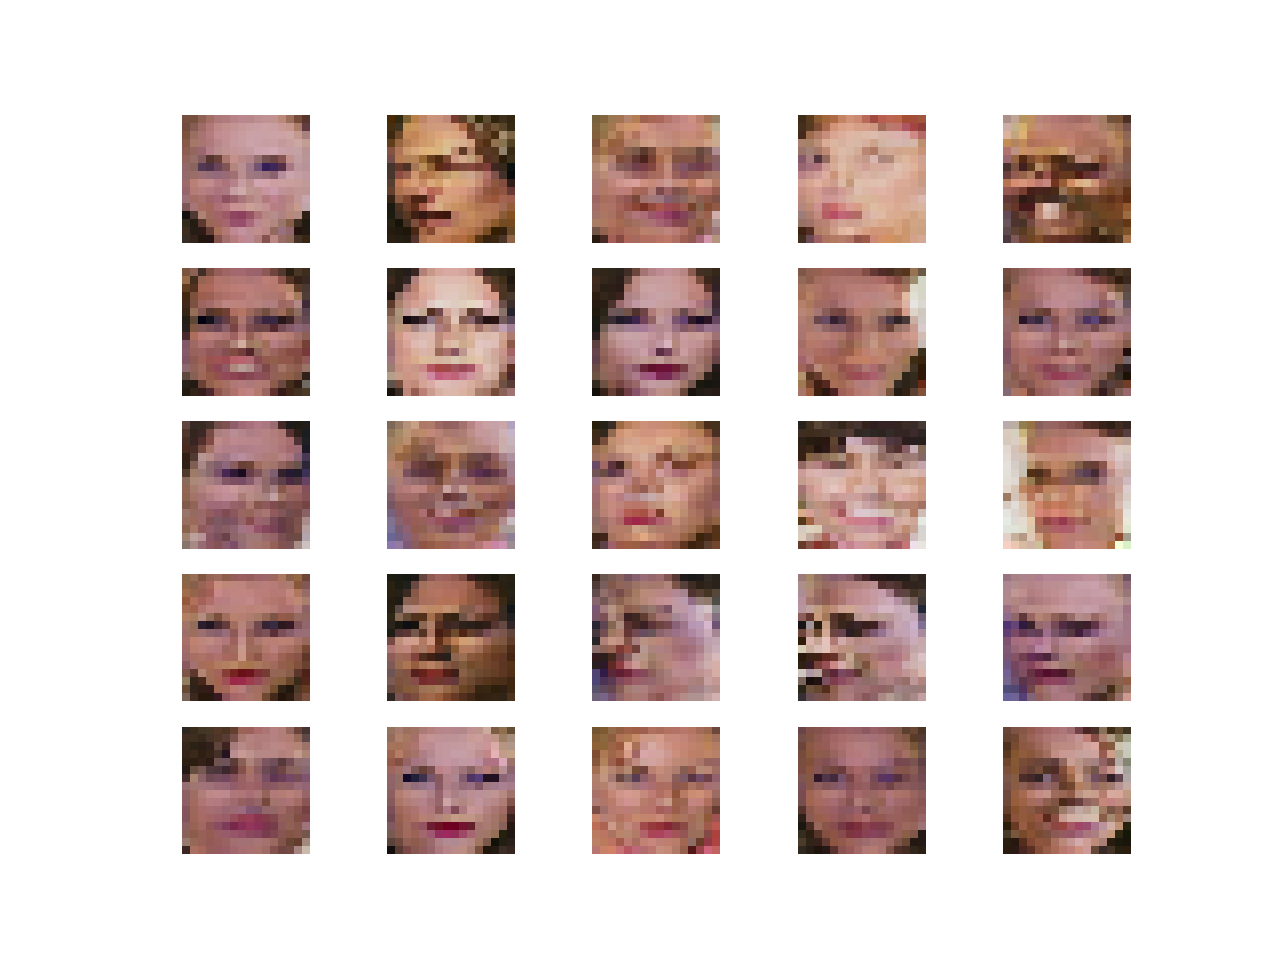